In [ ]:
# Import Libraries
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
import ast
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE  
from sklearn.feature_selection import SelectKBest, mutual_info_classif 

In [2]:
python -m pip install pandas

SyntaxError: invalid syntax (554273624.py, line 1)

In [3]:
# Load Datasets
attack_free_df = pd.read_csv('Attack_free_dataset.csv')
dos_attack_df = pd.read_csv('DoS_attack_dataset.csv')

print("DoS Attack Data:\n", dos_attack_df.head())
print("Attack-Free Data:\n", attack_free_df.head())

DoS Attack Data:
    Timestamp    ID  RTR  DLC                                              Data
0   0.000000  0000    0    8  ['00', '00', '00', '00', '00', '00', '00', '00']
1   0.000271  0080    0    8  ['00', '17', 'dc', '09', '16', '11', '16', 'bb']
2   0.000495  0000    0    8  ['00', '00', '00', '00', '00', '00', '00', '00']
3   0.000736  0081    0    8  ['40', '84', '87', '00', '00', '00', '00', '6b']
4   0.000983  0000    0    8  ['00', '00', '00', '00', '00', '00', '00', '00']
Attack-Free Data:
    Timestamp    ID  RTR  DLC                                              Data
0   0.000000  0316    0    8  ['05', '20', 'ea', '0a', '20', '1a', '00', '7f']
1   0.000224  0329    0    8  ['d7', 'a7', '7f', '8c', '11', '2f', '00', '10']
2   0.000462  0080    0    8  ['00', '17', 'ea', '0a', '20', '1a', '20', '43']
3   0.000704  0081    0    8  ['7f', '84', '60', '00', '00', '00', '00', '53']
4   0.000878  0120    0    4                          ['00', '00', '00', '00']


In [4]:
# Initial Data Exploration (Checking missing values and structure)
print("Attack-Free Dataset Info:\n")
print(attack_free_df.info())
print("\nDoS Attack Dataset Info:\n")
print(dos_attack_df.info())

Attack-Free Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268519 entries, 0 to 2268518
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   ID         object 
 2   RTR        int64  
 3   DLC        int64  
 4   Data       object 
dtypes: float64(1), int64(2), object(2)
memory usage: 86.5+ MB
None

DoS Attack Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656579 entries, 0 to 656578
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  656579 non-null  float64
 1   ID         656579 non-null  object 
 2   RTR        656579 non-null  int64  
 3   DLC        656579 non-null  int64  
 4   Data       645785 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 25.0+ MB
None


In [5]:
# EDA
# Checking the descriptive statistics
# Descriptive statistics for attack-free dataset
attack_free_describe = attack_free_df.describe()

# Descriptive statistics for DoS attack dataset
dos_attack_describe = dos_attack_df.describe()

attack_free_describe, dos_attack_describe
print("Descriptive statistics in DoS Attack Data:\n", dos_attack_describe)
print("Descriptive statistics in Attack-Free Data:\n", attack_free_describe)

Descriptive statistics in DoS Attack Data:
            Timestamp            RTR            DLC
count  656579.000000  656579.000000  656579.000000
mean      159.951029       1.643976       7.780528
std        88.707143      12.715942       1.141138
min         0.000000       0.000000       0.000000
25%        90.082815       0.000000       8.000000
50%       159.131421       0.000000       8.000000
75%       238.196666       0.000000       8.000000
max       306.296857     100.000000       8.000000
Descriptive statistics in Attack-Free Data:
           Timestamp        RTR           DLC
count  2.268519e+06  2268519.0  2.268519e+06
mean   5.187893e+02        0.0  7.786305e+00
std    2.995282e+02        0.0  8.498346e-01
min    0.000000e+00        0.0  2.000000e+00
25%    2.593930e+02        0.0  8.000000e+00
50%    5.187775e+02        0.0  8.000000e+00
75%    7.781951e+02        0.0  8.000000e+00
max    1.037590e+03        0.0  8.000000e+00


In [6]:
# Checking for missing values
print("Missing Values in DoS Attack Data:\n", dos_attack_df.isnull().sum())
print("Missing Values in Attack-Free Data:\n", attack_free_df.isnull().sum())

Missing Values in DoS Attack Data:
 Timestamp        0
ID               0
RTR              0
DLC              0
Data         10794
dtype: int64
Missing Values in Attack-Free Data:
 Timestamp    0
ID           0
RTR          0
DLC          0
Data         0
dtype: int64


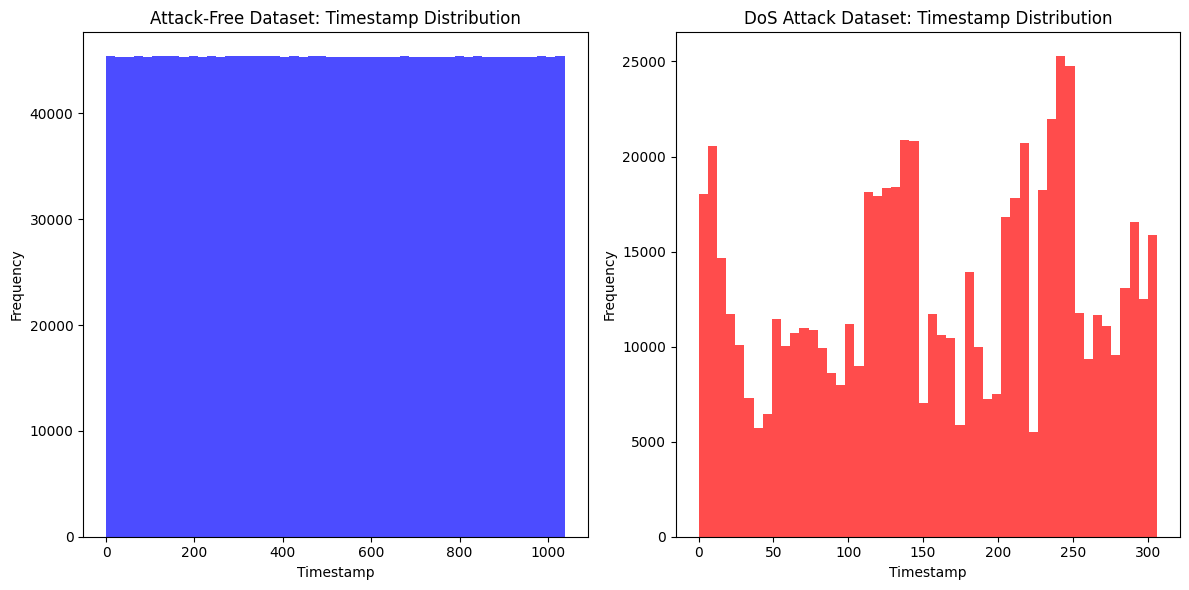

In [7]:
# Plot the distribution of 'Timestamp' and 'DLC' from both datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(attack_free_df['Timestamp'], bins=50, color='blue', alpha=0.7)
plt.title('Attack-Free Dataset: Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dos_attack_df['Timestamp'], bins=50, color='red', alpha=0.7)
plt.title('DoS Attack Dataset: Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

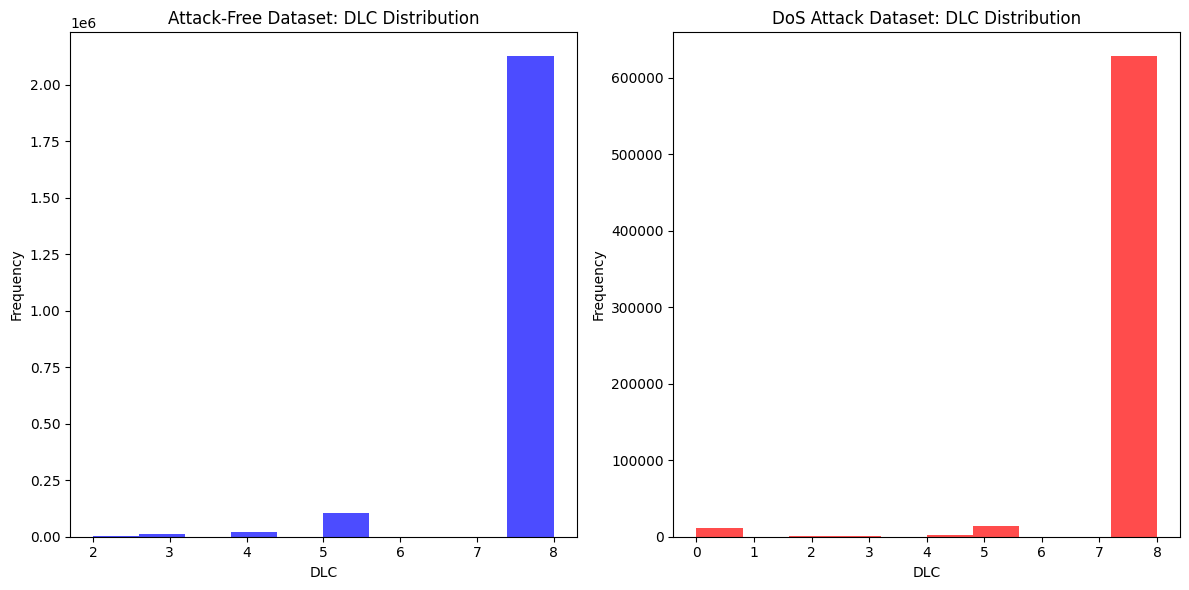

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(attack_free_df['DLC'], bins=10, color='blue', alpha=0.7)
plt.title('Attack-Free Dataset: DLC Distribution')
plt.xlabel('DLC')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dos_attack_df['DLC'], bins=10, color='red', alpha=0.7)
plt.title('DoS Attack Dataset: DLC Distribution')
plt.xlabel('DLC')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Data Cleaning
# For DoS Attack Dataset, I handle missing values by filling them with default values.
dos_attack_df['Data'] = dos_attack_df['Data'].fillna("['00', '00', '00', '00', '00', '00', '00', '00']")

print("Missing Values in DoS Attack Dataset after filling:", dos_attack_df['Data'].isnull().sum())

Missing Values in DoS Attack Dataset after filling: 0


In [10]:
# Feature Engineering - Process the 'Data' column
# Convert the 'Data' column from string to actual lists of integers (hex bytes)

def process_data_column(data_column):
    return data_column.apply(lambda x: [int(byte, 16) for byte in ast.literal_eval(x)])

attack_free_df['Data_processed'] = process_data_column(attack_free_df['Data'])
dos_attack_df['Data_processed'] = process_data_column(dos_attack_df['Data'])

# Drop original 'Data' columns since they are processed
attack_free_df.drop(columns=['Data'], inplace=True)
dos_attack_df.drop(columns=['Data'], inplace=True)

In [11]:
# Remove 'RTR' column from attack-free dataset (it has no variance)
attack_free_df.drop(columns=['RTR'], inplace=True)

In [12]:
# Feature Extraction from 'Data_processed' (min, max, mean, std deviation of byte values)
def extract_features(df):
    df['min_data'] = df['Data_processed'].apply(min)
    df['max_data'] = df['Data_processed'].apply(max)
    df['mean_data'] = df['Data_processed'].apply(lambda x: sum(x) / len(x))
    df['std_data'] = df['Data_processed'].apply(lambda x: pd.Series(x).std())
    return df

# Apply feature extraction to both datasets
attack_free_df = extract_features(attack_free_df)
dos_attack_df = extract_features(dos_attack_df)

In [13]:
# Create Labels
# Label the attack-free dataset as 0 and DoS attack dataset as 1
attack_free_df['label'] = 0
dos_attack_df['label'] = 1

# Combine Both Datasets
combined_df = pd.concat([attack_free_df, dos_attack_df])

# Define Features and Labels
# Select the feature columns for training
feature_columns = ['min_data', 'max_data', 'mean_data', 'std_data']
X = combined_df[feature_columns]
y = combined_df['label']

# Feature selection using SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Show the selected features and their scores
feature_scores = selector.scores_
print("Feature Scores:\n", list(zip(feature_columns, feature_scores)))

Feature Scores:
 [('min_data', np.float64(0.0)), ('max_data', np.float64(0.21348750674839878)), ('mean_data', np.float64(0.20344575262098008)), ('std_data', np.float64(0.29783766353240715))]


In [ ]:
# Balance the dataset using SMOTE (oversampling minority class)
print("Class distribution before SMOTE:\n", y.value_counts())

smote = SMOTE(random_state=42) 
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking class imbalance after applying SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution before SMOTE:
 label
0    2268519
1     656579
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Model Training - Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train_scaled, y_train)

# Model Training - Voting Classifier (Random Forest + Logistic Regression)
log_clf = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('lr', log_clf)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42))])

In [16]:
from sklearn.metrics import confusion_matrix

# Model Evaluation for Random Forest
rf_predictions = rf_clf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Model Evaluation for Voting Classifier
voting_predictions = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, voting_predictions)
voting_precision = precision_score(y_test, voting_predictions)
voting_recall = recall_score(y_test, voting_predictions)
voting_f1 = f1_score(y_test, voting_predictions)
voting_conf_matrix = confusion_matrix(y_test, voting_predictions)

# Print Results
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")
print(f"Confusion Matrix:\n {rf_conf_matrix}")

print("\nVoting Classifier Results:")
print(f"Accuracy: {voting_accuracy}")
print(f"Precision: {voting_precision}")
print(f"Recall: {voting_recall}")
print(f"F1-Score: {voting_f1}")
print(f"Confusion Matrix:\n {voting_conf_matrix}")

Random Forest Results:
Accuracy: 0.896103333157007
Precision: 0.9124289163479785
Recall: 0.8764132902896051
F1-Score: 0.8940585433021611
Confusion Matrix:
 [[622984  57270]
 [ 84145 596713]]

Voting Classifier Results:
Accuracy: 0.761607420991072
Precision: 0.8884197447439265
Recall: 0.5986079329316832
F1-Score: 0.7152726407999909
Confusion Matrix:
 [[629066  51188]
 [273291 407567]]


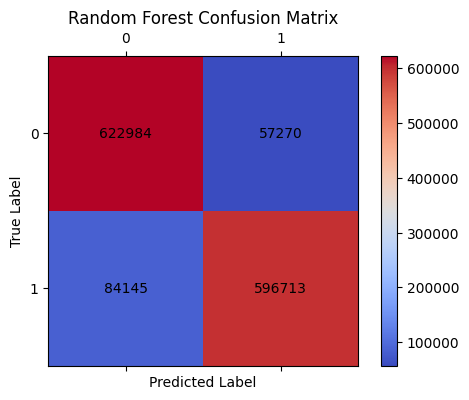

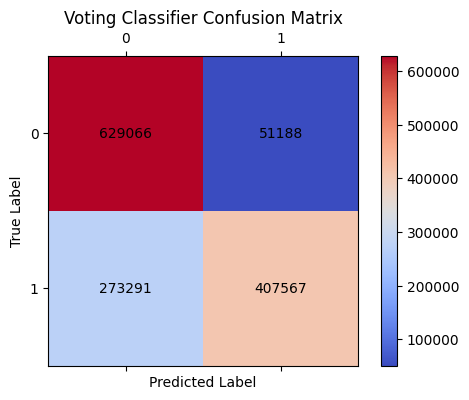

In [17]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
plt.matshow(rf_conf_matrix, cmap='coolwarm', fignum=1)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()

# Annotate the Random Forest confusion matrix with numbers
for i in range(rf_conf_matrix.shape[0]):
    for j in range(rf_conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=rf_conf_matrix[i, j], ha='center', va='center', color='black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot confusion matrix for Voting Classifier
plt.figure(figsize=(6, 4))
plt.matshow(voting_conf_matrix, cmap='coolwarm', fignum=1)
plt.title('Voting Classifier Confusion Matrix')
plt.colorbar()

# Annotate the Voting Classifier confusion matrix with numbers
for i in range(voting_conf_matrix.shape[0]):
    for j in range(voting_conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=voting_conf_matrix[i, j], ha='center', va='center', color='black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [18]:
# Feature importance from RandomForest
rf_clf.fit(X_train_scaled, y_train)
importances = rf_clf.feature_importances_
print("Feature Importances:")
for feature, importance in zip(feature_columns, importances):
    print(f"{feature}: {importance}")

Feature Importances:
min_data: 0.0
max_data: 0.27273885938854675
mean_data: 0.35029391795454323
std_data: 0.3769672226569099
